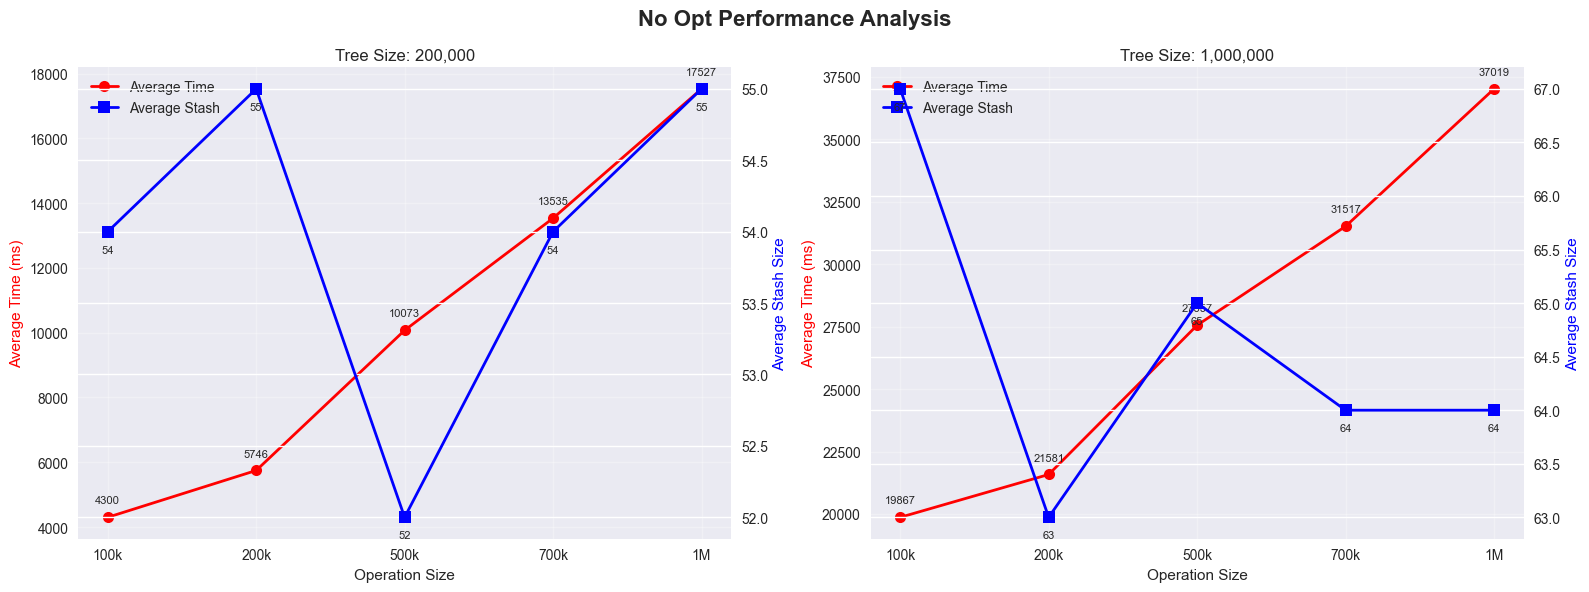


=== No Opt Algorithm Summary ===
Average Time: 18872 ms
Average Stash Size: 59.3
Time Range: 4300 - 37019 ms
Stash Range: 52 - 67

Detailed Performance Table for No Opt:
Operation Size  Tree Size    Avg Time     Min Time     Max Time     Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000          200000       4300         4255         4367         54           51           60          
100000          1000000      19867        19461        20466        67           62           76          
200000          200000       5746         5685         5796         55           52           59          
200000          1000000      21581        21368        21911        63           61           67          
500000          200000       10073        9895         10322        52           50           55          
500000          1000000      27557        27089        28036        65           62           69          

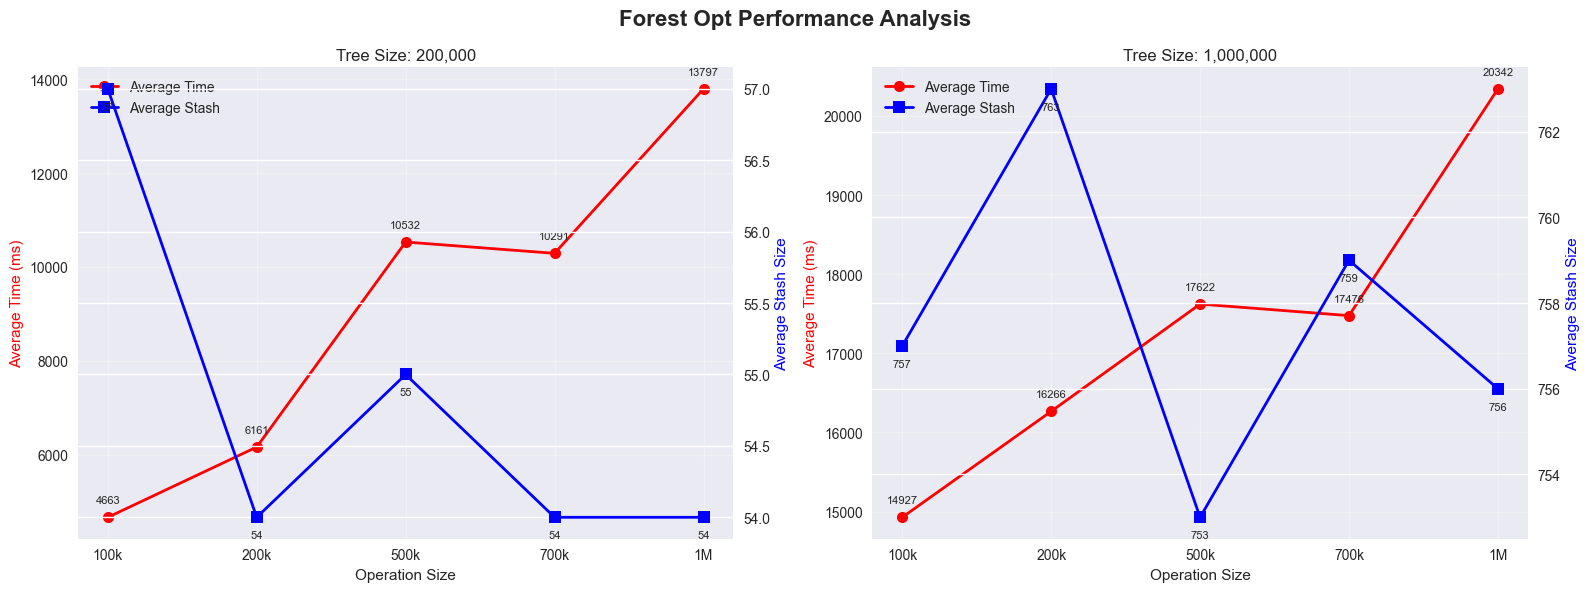


=== Forest Opt Algorithm Summary ===
Average Time: 13208 ms
Average Stash Size: 406.2
Time Range: 4663 - 20342 ms
Stash Range: 54 - 763

Detailed Performance Table for Forest Opt:
Operation Size  Tree Size    Avg Time     Min Time     Max Time     Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000          200000       4663         4614         4699         57           53           61          
100000          1000000      14927        14851        14993        757          729          768         
200000          200000       6161         6092         6230         54           52           60          
200000          1000000      16266        16154        16357        763          750          775         
500000          200000       10532        10311        10737        55           51           61          
500000          1000000      17622        13587        20571        753          727          77

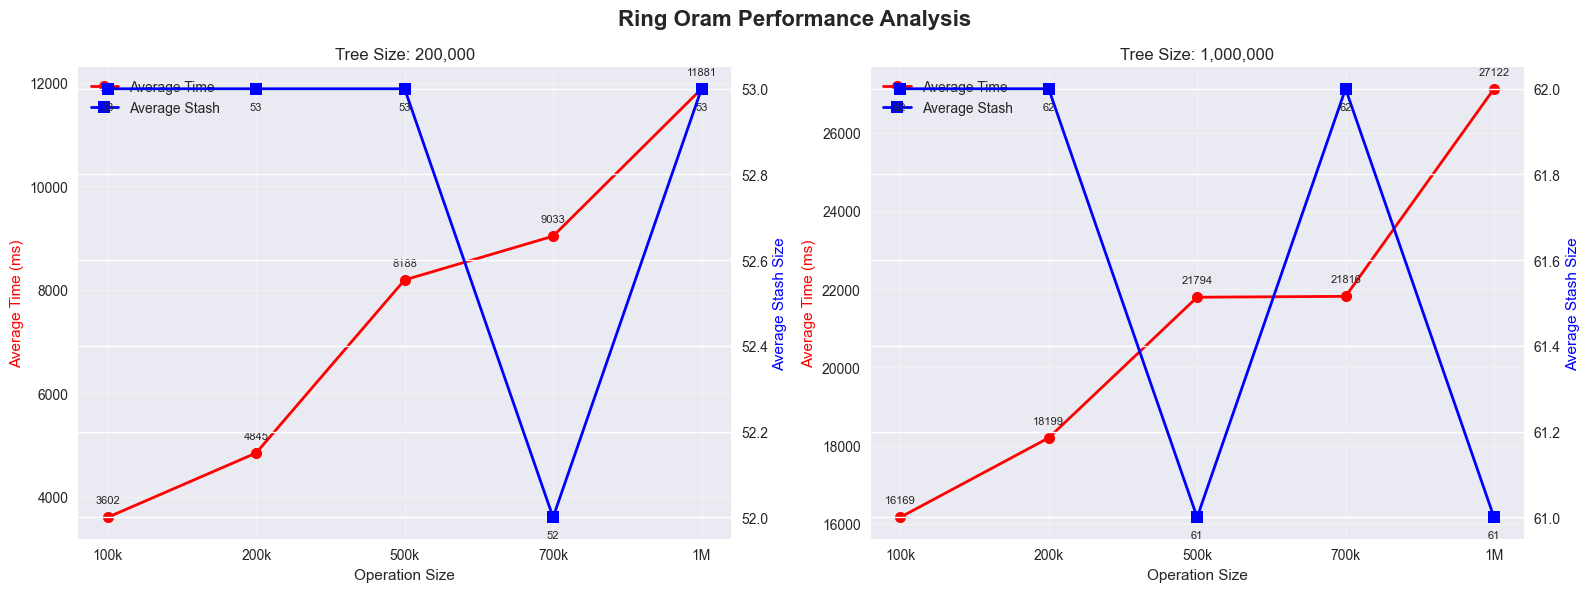


=== Ring Oram Algorithm Summary ===
Average Time: 14265 ms
Average Stash Size: 57.2
Time Range: 3602 - 27122 ms
Stash Range: 52 - 62

Detailed Performance Table for Ring Oram:
Operation Size  Tree Size    Avg Time     Min Time     Max Time     Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000          200000       3602         3508         3670         53           49           59          
100000          1000000      16169        15985        16347        62           60           66          
200000          200000       4845         4781         4883         53           50           59          
200000          1000000      18199        17793        19231        62           61           65          
500000          200000       8188         8069         8339         53           52           56          
500000          1000000      21794        20611        23676        61           58           66    

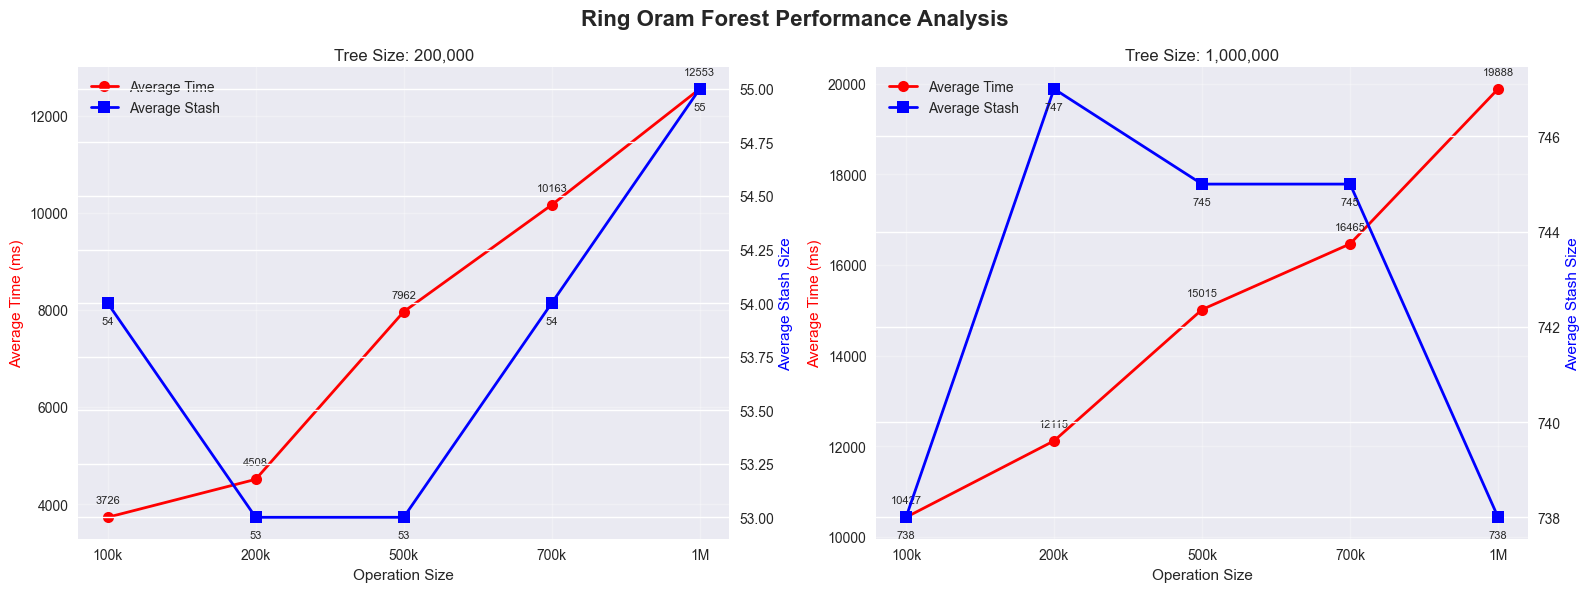


=== Ring Oram Forest Algorithm Summary ===
Average Time: 11282 ms
Average Stash Size: 398.2
Time Range: 3726 - 19888 ms
Stash Range: 53 - 747

Detailed Performance Table for Ring Oram Forest:
Operation Size  Tree Size    Avg Time     Min Time     Max Time     Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000          200000       3726         3015         4710         54           50           59          
100000          1000000      10427        9650         12331        738          726          759         
200000          200000       4508         4360         4623         53           51           56          
200000          1000000      12115        11935        12222        747          729          763         
500000          200000       7962         7845         8046         53           51           55          
500000          1000000      15015        14806        15240        745          727

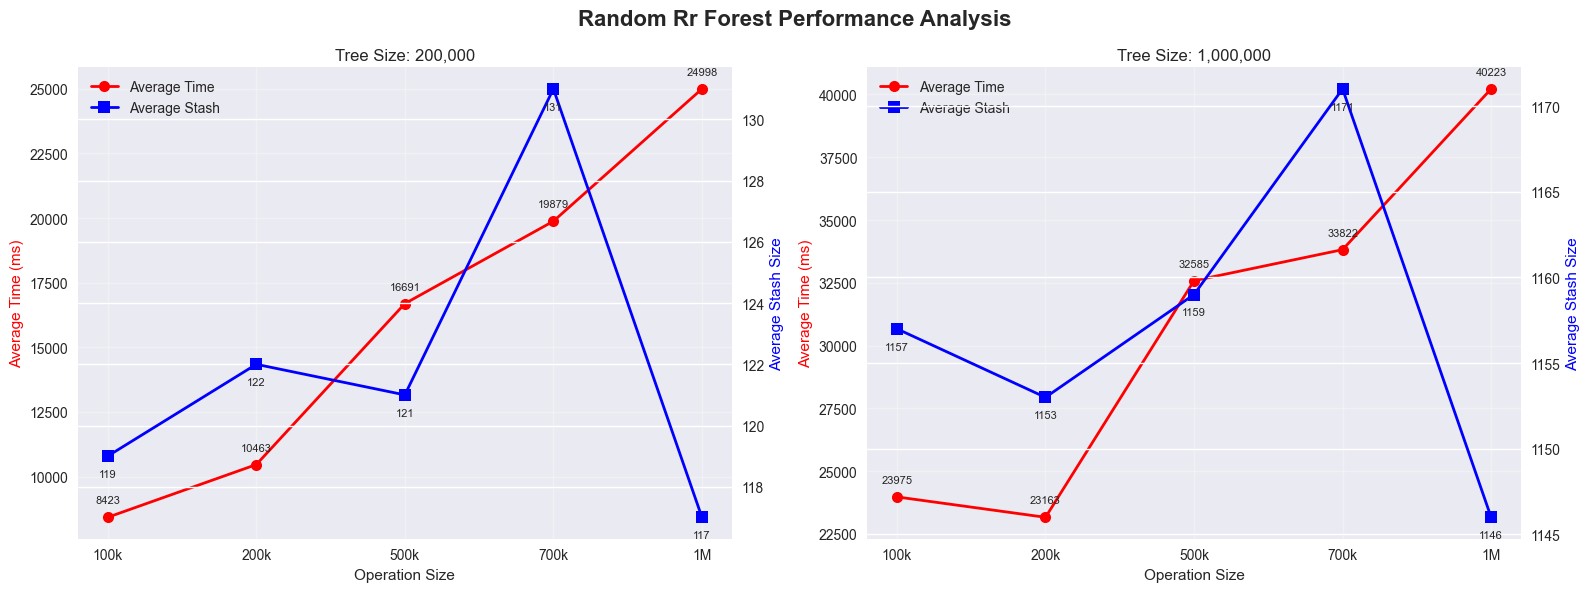


=== Random Rr Forest Algorithm Summary ===
Average Time: 23422 ms
Average Stash Size: 639.6
Time Range: 8423 - 40223 ms
Stash Range: 117 - 1171

Detailed Performance Table for Random Rr Forest:
Operation Size  Tree Size    Avg Time     Min Time     Max Time     Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000          200000       8423         8254         8775         119          104          129         
100000          1000000      23975        22755        24773        1157         1111         1203        
200000          200000       10463        10231        10726        122          104          141         
200000          1000000      23163        22452        24901        1153         1083         1208        
500000          200000       16691        16208        17135        121          100          142         
500000          1000000      32585        30973        33768        1159         1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

colors = {
    'no_opt': '#1f77b4',
    'forest_opt': '#ff7f0e', 
    'ring_oram': '#2ca02c',
    'ring_oram_forest': '#d62728',
    'random_rr_forest': '#9467bd'
}

csv_files = {
    'no_opt': 'result_no_opt.csv',
    'forest_opt': 'result_forest_opt.csv',
    'ring_oram': 'result_ring_oram.csv',
    'ring_oram_forest': 'result_ring_oram_forest.csv',
    'random_rr_forest': 'result_random_rr_forest.csv'
}

dataframes = {}
for name, file in csv_files.items():
    dataframes[name] = pd.read_csv(file)

for name, df in dataframes.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    fig.suptitle(f'{name.replace("_", " ").title()} Performance Analysis', 
                 fontsize=16, fontweight='bold')
    
    subset_200k = df[df['tree_size'] == 200000]
    
    x_positions = [0, 1, 2, 3, 4]
    x_labels = ['100k', '200k', '500k', '700k', '1M']
    
    line1 = ax1.plot(x_positions, subset_200k['avg_time'], 
                     marker='o', linewidth=2, markersize=8, color='red', 
                     label='Average Time')
    
    ax1_twin = ax1.twinx()
    line2 = ax1_twin.plot(x_positions, subset_200k['avg_stash'], 
                          marker='s', linewidth=2, markersize=8, color='blue', 
                          label='Average Stash')
    
    for i, y in enumerate(subset_200k['avg_time']):
        ax1.annotate(f'{y:.0f}', (i, y), textcoords="offset points", 
                     xytext=(0,10), ha='center', fontsize=8)
    
    for i, y in enumerate(subset_200k['avg_stash']):
        ax1_twin.annotate(f'{y:.0f}', (i, y), textcoords="offset points", 
                          xytext=(0,-15), ha='center', fontsize=8)
    
    ax1.set_xlabel('Operation Size')
    ax1.set_ylabel('Average Time (ms)', color='red')
    ax1_twin.set_ylabel('Average Stash Size', color='blue')
    ax1.set_title('Tree Size: 200,000')
    ax1.grid(True, alpha=0.3)
    
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(x_labels)
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_twin.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    subset_1m = df[df['tree_size'] == 1000000]
    
    line3 = ax2.plot(x_positions, subset_1m['avg_time'], 
                     marker='o', linewidth=2, markersize=8, color='red', 
                     label='Average Time')
    
    ax2_twin = ax2.twinx()
    line4 = ax2_twin.plot(x_positions, subset_1m['avg_stash'], 
                          marker='s', linewidth=2, markersize=8, color='blue', 
                          label='Average Stash')
    
    for i, y in enumerate(subset_1m['avg_time']):
        ax2.annotate(f'{y:.0f}', (i, y), textcoords="offset points", 
                     xytext=(0,10), ha='center', fontsize=8)
    
    for i, y in enumerate(subset_1m['avg_stash']):
        ax2_twin.annotate(f'{y:.0f}', (i, y), textcoords="offset points", 
                          xytext=(0,-15), ha='center', fontsize=8)
    
    ax2.set_xlabel('Operation Size')
    ax2.set_ylabel('Average Time (ms)', color='red')
    ax2_twin.set_ylabel('Average Stash Size', color='blue')
    ax2.set_title('Tree Size: 1,000,000')
    ax2.grid(True, alpha=0.3)
    
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(x_labels)
    
    lines3, labels3 = ax2.get_legend_handles_labels()
    lines4, labels4 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines3 + lines4, labels3 + labels4, loc='upper left')
    
    plt.tight_layout()
    plt.savefig(f'{name}_individual_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n=== {name.replace('_', ' ').title()} Algorithm Summary ===")
    print(f"Average Time: {df['avg_time'].mean():.0f} ms")
    print(f"Average Stash Size: {df['avg_stash'].mean():.1f}")
    print(f"Time Range: {df['avg_time'].min():.0f} - {df['avg_time'].max():.0f} ms")
    print(f"Stash Range: {df['avg_stash'].min():.0f} - {df['avg_stash'].max():.0f}")
    
    print(f"\nDetailed Performance Table for {name.replace('_', ' ').title()}:")
    print("=" * 80)
    print(f"{'Operation Size':<15} {'Tree Size':<12} {'Avg Time':<12} {'Min Time':<12} {'Max Time':<12} {'Avg Stash':<12} {'Min Stash':<12} {'Max Stash':<12}")
    print("-" * 80)
    
    for _, row in df.iterrows():
        print(f"{row['operate_size']:<15} {row['tree_size']:<12} {row['avg_time']:<12.0f} {row['min_time']:<12.0f} {row['max_time']:<12.0f} {row['avg_stash']:<12.0f} {row['min_stash']:<12.0f} {row['max_stash']:<12.0f}")
    
    print("=" * 80)
    print()

print("\n" + "="*100)
print("COMPREHENSIVE COMPARISON TABLE")
print("="*100)

comparison_data = []
for name, df in dataframes.items():
    comparison_data.append({
        'Algorithm': name.replace('_', ' ').title(),
        'Avg Time (ms)': df['avg_time'].mean(),
        'Min Time (ms)': df['avg_time'].min(),
        'Max Time (ms)': df['avg_time'].max(),
        'Avg Stash': df['avg_stash'].mean(),
        'Min Stash': df['avg_stash'].min(),
        'Max Stash': df['avg_stash'].max(),
        'Time Std Dev': df['avg_time'].std(),
        'Stash Std Dev': df['avg_stash'].std()
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False, float_format='%.1f'))

print("\n" + "="*80)
print("PERFORMANCE RANKINGS")
print("="*80)

time_ranking = comparison_df.sort_values('Avg Time (ms)')
print("\nTime Performance Ranking (Best to Worst):")
for i, (_, row) in enumerate(time_ranking.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Avg Time (ms)']:.0f} ms")

stash_ranking = comparison_df.sort_values('Avg Stash')
print("\nStash Size Ranking (Best to Worst):")
for i, (_, row) in enumerate(stash_ranking.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Avg Stash']:.1f}")

print("\n" + "="*80) 